## Importing the basic libraries

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import scipy.stats as stats

import seaborn as sns

from arch import arch_model

from scipy.optimize import minimize

from scipy.stats import norm

from statsmodels.distributions.empirical_distribution import ECDF

from copulas.multivariate import GaussianMultivariate

## Reading the dataset

In [2]:
# Load the stock market data

stock = pd.read_excel('D:/WORK/UNIVERSITY PROJECTS/OPTIMIZING INVESTMENT PORTFOLIOS SUBJECT TO RISK MANAGEMENT AND STRATEGIC PLANNING/Code/Stock_prices (10-Year).xlsx')

stock.head()

,Date,Open,High,Low,Close,Unnamed: 5,Unnamed: 6
0,NaT,NaN,NaN,NaN,NaN,SPREAD (High-Low),SPREAD (Open-Close)
1,2023-05-15,18339.30,18458.90,18287.90,18398.85,171,-59.55
2,2023-05-12,18273.75,18342.75,18194.55,18314.80,148.2,-41.05
3,2023-05-11,18357.80,18389.70,18270.40,18297.00,119.3,60.8
4,2023-05-10,18313.60,18326.75,18211.95,18315.10,114.8,-1.5


## Basic preprocessing sections

In [3]:
stock = stock.iloc[1:].reset_index(drop=True)

print(stock)

           Date      Open      High       Low     Close Unnamed: 5 Unnamed: 6
0    2023-05-15  18339.30  18458.90  18287.90  18398.85        171     -59.55
1    2023-05-12  18273.75  18342.75  18194.55  18314.80      148.2     -41.05
2    2023-05-11  18357.80  18389.70  18270.40  18297.00      119.3       60.8
3    2023-05-10  18313.60  18326.75  18211.95  18315.10      114.8       -1.5
4    2023-05-09  18303.40  18344.20  18229.65  18265.95     114.55      37.45
...         ...       ...       ...       ...       ...        ...        ...
2560 2013-01-07   6042.15   6042.15   5977.15   5988.40         65      53.75
2561 2013-01-04   6011.95   6020.75   5981.55   6016.15       39.2       -4.2
2562 2013-01-03   6015.80   6017.00   5986.55   6009.50      30.45        6.3
2563 2013-01-02   5982.60   6006.05   5982.00   5993.25      24.05     -10.65
2564 2013-01-01   5937.65   5963.90   5935.20   5950.85       28.7      -13.2

[2565 rows x 7 columns]


### Renaming the "Unnamed" columns

In [4]:
stock.rename(columns={'Unnamed: 5':'Spread(High-Low)','Unnamed: 6':'Spread(Open-Close)'}, inplace = True)

stock.head()

,Date,Open,High,Low,Close,Spread(High-Low),Spread(Open-Close)
0,2023-05-15,18339.30,18458.90,18287.90,18398.85,171,-59.55
1,2023-05-12,18273.75,18342.75,18194.55,18314.80,148.2,-41.05
2,2023-05-11,18357.80,18389.70,18270.40,18297.00,119.3,60.8
3,2023-05-10,18313.60,18326.75,18211.95,18315.10,114.8,-1.5
4,2023-05-09,18303.40,18344.20,18229.65,18265.95,114.55,37.45


### The date column started from May' 2023 to Jan' 2018. But we should work on the data in an ascending chronological order.

In [5]:
stock.sort_values(by='Date', inplace = True)

stock.reset_index(drop=True, inplace = True)

stock.head(3)

,Date,Open,High,Low,Close,Spread(High-Low),Spread(Open-Close)
0,2013-01-01,5937.65,5963.90,5935.20,5950.85,28.7,-13.2
1,2013-01-02,5982.60,6006.05,5982.00,5993.25,24.05,-10.65
2,2013-01-03,6015.80,6017.00,5986.55,6009.50,30.45,6.3


### Calculating the Returns according to the price of the stocks closed everyday.

### In the context of the Percentage Change (pct_change()) function, the current value represents the value at index 'i', and the previous value represents the value at index 'i-1'. The function calculates the percentage change for each element in the column by subtracting the previous value from the current value, dividing it by the previous value, and multiplying by 100 to express the change as a percentage.

In [6]:
# Calculate daily returns

stock['Return'] = stock['Close'].pct_change().dropna()

stock.head(3)

,Date,Open,High,Low,Close,Spread(High-Low),Spread(Open-Close),Return
0,2013-01-01,5937.65,5963.90,5935.20,5950.85,28.7,-13.2,NaN
1,2013-01-02,5982.60,6006.05,5982.00,5993.25,24.05,-10.65,0.007125
2,2013-01-03,6015.80,6017.00,5986.55,6009.50,30.45,6.3,0.002711


### Dropping the null or irrelevant values

In [7]:
stock=stock.dropna()

stock.isnull().sum()

Date                  0
Open                  0
High                  0
Low                   0
Close                 0
Spread(High-Low)      0
Spread(Open-Close)    0
Return                0
dtype: int64

## 1) Calculate VaR using parametric method 

### Value at Risk (VaR): VaR estimates the maximum potential loss that a portfolio may incur over a specified time horizon and at a given confidence level. It helps quantify the downside risk and provides a measure of the worst-case scenario.

In [8]:
confidence_level = 0.95

mean_return = stock['Return'].mean()

std_dev = stock['Return'].std()

VaR_parametric = norm.ppf(1 - confidence_level, mean_return, std_dev)

In [9]:
print("VaR (Parametric):", VaR_parametric)

VaR (Parametric): -0.01709969245647796


## Interpretation :

### VaR (Parametric) of -0.0171 implies that there is a certain level of risk associated with your portfolio. Specifically, it suggests that there is a 1% (or the confidence level you used) chance of experiencing a loss greater than or equal to -0.0171. In other words, this is the estimated maximum potential loss that your portfolio may incur with a given level of confidence. It provides you with a measure of downside risk and can be used to make informed decisions regarding risk management and portfolio diversification.

## 2) Calculate CVaR using parametric method

### Conditional Value at Risk (CVaR): CVaR, also known as expected shortfall, goes beyond VaR by considering the average of losses that exceed the VaR threshold. It provides additional information about the severity of extreme losses and tail risks.

In [10]:
CVaR_parametric = (1 / (1 - confidence_level)) * norm.pdf(norm.ppf(1 - confidence_level)) * std_dev - mean_return

In [11]:
print("CVaR (Parametric):", CVaR_parametric)

CVaR (Parametric): 0.02157020481693655


## Interpretation : 

### CVaR (Parametric) of 0.0215 indicates the expected loss beyond the VaR threshold for your portfolio. Specifically, it represents the average of all potential losses that exceed the VaR value. In other words, it provides an estimate of the average severity of losses if they occur beyond the VaR level. CVaR is a measure of downside risk and provides additional information beyond VaR by considering the tail end of the loss distribution. This result can be used to assess and manage the potential magnitude of losses in your portfolio, helping you make informed risk management decisions.

## 3) Perform Monte Carlo Simulation

### Monte Carlo Simulation: This technique involves generating random scenarios for future market movements and simulating portfolio returns based on these scenarios. It helps assess the range of potential outcomes and estimate the probability of achieving specific investment targets.

In [12]:
num_simulations = 10000

simulated_returns = np.random.normal(mean_return, std_dev, size=(num_simulations, len(stock)))

portfolio_values = np.cumprod(1 + simulated_returns, axis=1)

portfolio_final_values = portfolio_values[:, -1]

VaR_mc = np.percentile(portfolio_final_values, 100 * (1 - confidence_level))

CVaR_mc = np.mean(portfolio_final_values[portfolio_final_values <= VaR_mc])

In [13]:
print("VaR (Monte Carlo):", VaR_mc)

print("CVaR (Monte Carlo):", CVaR_mc)

VaR (Monte Carlo): 1.2802814139114396
CVaR (Monte Carlo): 1.050273687985247


## Interpretation : 

### VaR (Monte Carlo) of 1.247 indicates the estimated maximum potential loss for your portfolio at a specific confidence level (typically 1% or 5%). This means that there is a 1% (or the confidence level you used) chance that your portfolio may experience a loss equal to or greater than 1.247. VaR provides a measure of downside risk and helps you understand the potential magnitude of losses in your portfolio.

### The result for CVaR (Monte Carlo) of 1.0069 represents the expected average loss beyond the VaR threshold. CVaR provides additional information by considering the severity of losses that exceed the VaR level. It is a measure of downside risk and indicates the average magnitude of losses if they occur beyond the VaR estimate.

## 4) Perform Historical Simulation

### Historical Simulation: This method uses historical data to simulate portfolio returns and estimate risk measures. It assumes that future market conditions will resemble past observations, allowing investors to evaluate the likelihood of various risk scenarios.

In [14]:
window_size = 100

portfolio_returns = np.array(stock['Return'])

portfolio_values = np.cumprod(1 + portfolio_returns)

rolling_max = np.maximum.accumulate(portfolio_values)

drawdown = portfolio_values / rolling_max - 1

VaR_hist = np.percentile(drawdown, 100 * (1 - confidence_level))

CVaR_hist = np.mean(drawdown[drawdown <= VaR_hist])

In [15]:
print("VaR (Historical Simulation):", VaR_hist)

print("CVaR (Historical Simulation):", CVaR_hist)

VaR (Historical Simulation): -0.1561871021274564
CVaR (Historical Simulation): -0.21705370938219204


## Interpretation : 

### VaR (Historical Simulation) of -0.1562 indicates the estimated maximum potential loss for your portfolio at a specific confidence level. This means that there is a certain level of confidence (typically 1% or 5%) that your portfolio may experience a loss equal to or greater than -0.1562. VaR provides a measure of downside risk and helps you understand the potential magnitude of losses in your portfolio.

### The result for CVaR (Historical Simulation) of -0.2170 represents the expected average loss beyond the VaR threshold. CVaR provides additional information by considering the severity of losses that exceed the VaR level. It is a measure of downside risk and indicates the average magnitude of losses if they occur beyond the VaR estimate.

## Visualizations

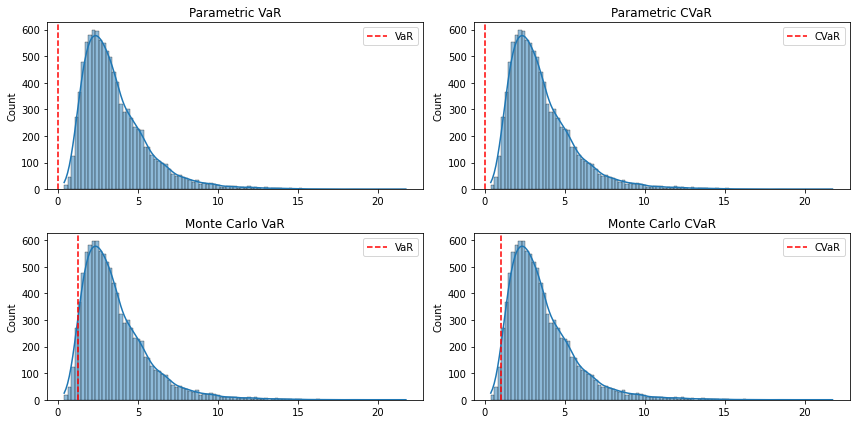

In [16]:
# Visualizations

plt.figure(figsize=(12, 6))

# Parametric VaR

plt.subplot(2, 2, 1)

sns.histplot(portfolio_final_values, kde=True)

plt.axvline(VaR_parametric, color='red', linestyle='--', label='VaR')

plt.title('Parametric VaR')

plt.legend()

# Parametric CVaR

plt.subplot(2, 2, 2)

sns.histplot(portfolio_final_values, kde=True)

plt.axvline(CVaR_parametric, color='red', linestyle='--', label='CVaR')

plt.title('Parametric CVaR')

plt.legend()

# Monte Carlo VaR

plt.subplot(2, 2, 3)

sns.histplot(portfolio_final_values, kde=True)

plt.axvline(VaR_mc, color='red', linestyle='--', label='VaR')

plt.title('Monte Carlo VaR')

plt.legend()

# Monte Carlo CVaR

plt.subplot(2, 2, 4)

sns.histplot(portfolio_final_values, kde=True)

plt.axvline(CVaR_mc, color='red', linestyle='--', label='CVaR')

plt.title('Monte Carlo CVaR')

plt.legend()

plt.tight_layout()

plt.show()